# Part II - Factors affecting loans outcome
## by: Ige Amos Fadele

## Investigation Overview

The goal of this Investigation is to look into factors which can influence the outcome of loans. The main features to be addressed in this investigation are Loan Status, Borrower Rate (Interest rate), Credit Score, Prosper Rating, and Loan Original Amount.

I will start by plotting the distribution of the loan outcomes (seven loan statuses/categories) using a Bar chart and move on to check the correlation between the numerical features/variables using a Correlation plot and a Plot Matrix. After this I will then use a Clustered bar chart to check the relatiosnhip between the categorical features/variables and then finally use a Boxplot in a Pairgrid to check the relationship between the numerical and categorical features to determine their influence over one another.


## Dataset Overview

The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Types of Prosper rating ()Alpha
ProsperRating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

ProsperRatingClasses = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRating)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
loans['ProsperRating'] = loans['ProsperRating (Alpha)'].astype(ProsperRatingClasses);

loans['ProsperRating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

## Distributions of the Loan Status

The loan that are still in progress (in current loan status) has the highest counts among the total loans on file grouped by loan status. Only a handful of loan have past their due date or defaulted. These could depicts an healthy loan business.

In [4]:
# Creating a new column to have well defined loan statuses
loans["LoanStatusNow"] = loans["LoanStatus"].apply(lambda x:x.split()[0])
loans["LoanStatusNow"].replace('Past', 'Past Due', inplace=True)
loans["LoanStatusNow"].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

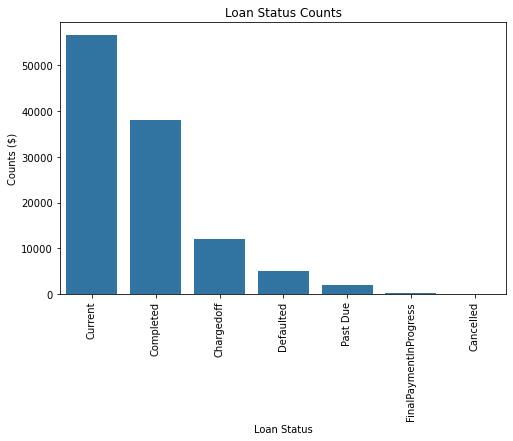

In [5]:
# This is a catgorical data, so Bar chart will be a suitable chart
# Plotting a Bar chart

# Set figsize

plt.rcParams["figure.figsize"] = (8,5)

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x='LoanStatusNow', order = loans.LoanStatusNow.value_counts().index, color = default_color)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Counts ($)')
plt.title("Loan Status Counts");

## Pairwise Correlation between numerical variables/features (Borrower Rate, Credit Score, and Loan Original Amount)

The correlation between Credit Score and Borrower rate (Interest rate) mildly-strong negative correlation and this makes sense since a borrower who has a high credit score is seen as a low-risk borrower and could get a lower interest rate if the interest rate varies and credit score is used as a determinant.

Also, Credit Score and approved Loan amount have a mildly-strong positive correlation. This also should not be a surprise since a high credit score depicts the borrower ia a low risk client and as such could easily have a higher amount approved to him as a loan.

As shown from the plots, the borrower rate (interest rate) and Loan amount have a kinda negative correlation and this could mean that those borrowers who receive loans of an high amount tends to have lower interest rates (borrower rate).

In [6]:
# Grouping the variables/features in numeric and categorical vairables

num_vars = ['CreditScoreRangeUpper', 'BorrowerRate', 'LoanOriginalAmount', ] # num_vars = numeric variables
cat_vars = ['LoanStatusNow', 'ProsperRating', 'EmploymentStatus', 'LoanTerm', 'IsBorrowerHomeOwner'] # cat_vars = categorical variables

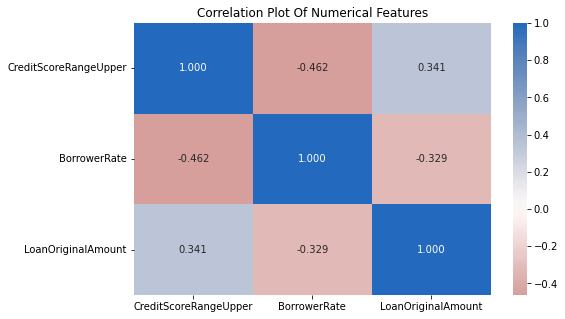

In [7]:
# Creating a correlation plot to check the correlation and correlation coefficient among the variables.

plt.figure(figsize = [8, 5])
sb.heatmap(loans[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title("Correlation Plot Of Numerical Features")
plt.show();

Text(0.5, 0.98, 'Plot Matix Of Numerical Features')

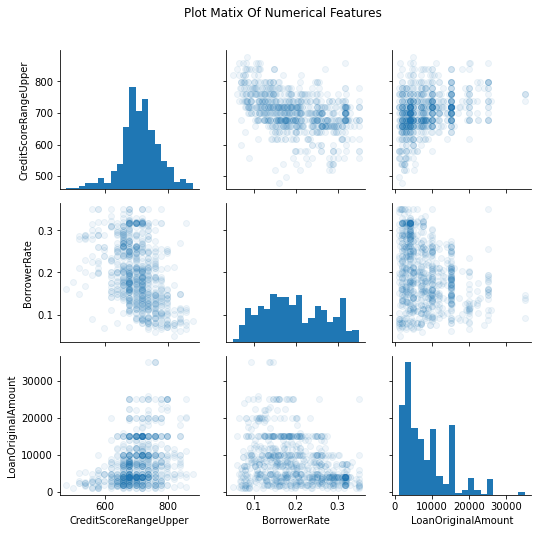

In [8]:
# Creating a plot matrix to check the correlation among the variables altogether at once.
# I want the plot to be clearer and run faster, so I woild be using a sample of 800 of the loans data.

samples = np.random.choice(loans.shape[0], 800, replace = False)
loansSample = loans.loc[samples,:]

g = sb.PairGrid(data = loansSample, vars = num_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha=1/15);

g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Plot Matix Of Numerical Features')

## Relationship between Loan Status and Prosper Rating

We can observe some good interactions between Loan status and Propser rating. 
Borrowers with Prosper rating of D and A have the highest count for completed loans, while for the loans in Current status, borrowers with Prosper rating of A, B and C have the highest counts. Other loan statuses seems to have very few occurences in the data so that makes their portion on the plot less visible.

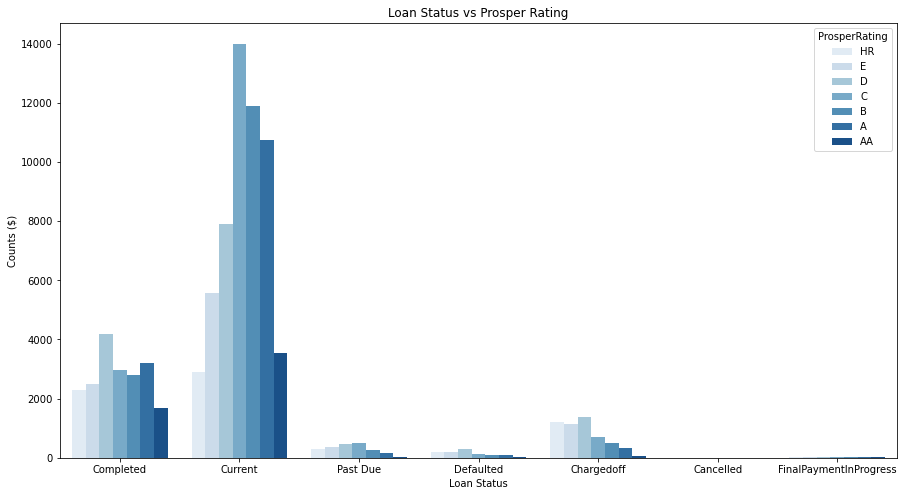

In [9]:
# Platting a Clustered bar charts for getting the relationship between Loan Status and Prosper Rating

plt.figure(figsize=(15, 8))

sb.countplot(data=loans, x='LoanStatusNow', hue='ProsperRating', palette='Blues');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.xlabel('Loan Status')
plt.ylabel('Counts ($)')
plt.title('Loan Status vs Prosper Rating');

## Relationship between numerical variables (Borrower Rate, Credit Score, and Loan Original Amount) and categorical variables (Loan Status and Prosper Rating)

Let us take the observations from the pairs one after the other.

The Credit score of borrowers who have their loan cancelled happens to be the lowest in average, probably the loan company discovered that their credit score is below what's required and cancelled their loan (or the loans did not eventually get disbursed). The borrowers who have their loans Past-due Defaulted happen to have the lower credit score (CreditScoreRangeUpper) in average.

When checking the Credit score and Proper rating relationship, a kinda parabolic curve is detected, however, if we remove the credit score of the borrowers with 'HR' Prosper rating, all other borrowers Proper Rating have a positive relationship with Credit Score, that is, apart from the 'HR' Prosper rating borrowers, the higher the Credit score of the other borrowers, the higher the Proper Rating.

The loans that were completed happens to have the lowest interest rate (BorrowerRate), while the three negative loans outcomes (past due, Chargedoff, Defaulted) happen to have the highest interest rate.

As expected, Prosper rating and Interest rate (BorrowerRate) have a negative relationship. The better the Prosper rating, the lesser the interest rate.

Interestingly, loans that were completed have lower Loan amount than loans that are still in Current status and loans that are Past-due.And it's discovered that Cancelled loans had the lowest Loan amount.

It's shown from the plot that borrowers with the very low Proper Rating get the smaller loan amount disbursed to them. The relationship between the disbursed loan amount (OriginalAloanAmount) and Prosper rating (ProsperRating) is positive. An upward (positive) movement is observed in the LoanOriginalAmount vs ProsperRating plot, It's observed that those borrowers with higher Prosper rating gets higher Loan amount disbursed to them.


<Figure size 1008x576 with 0 Axes>

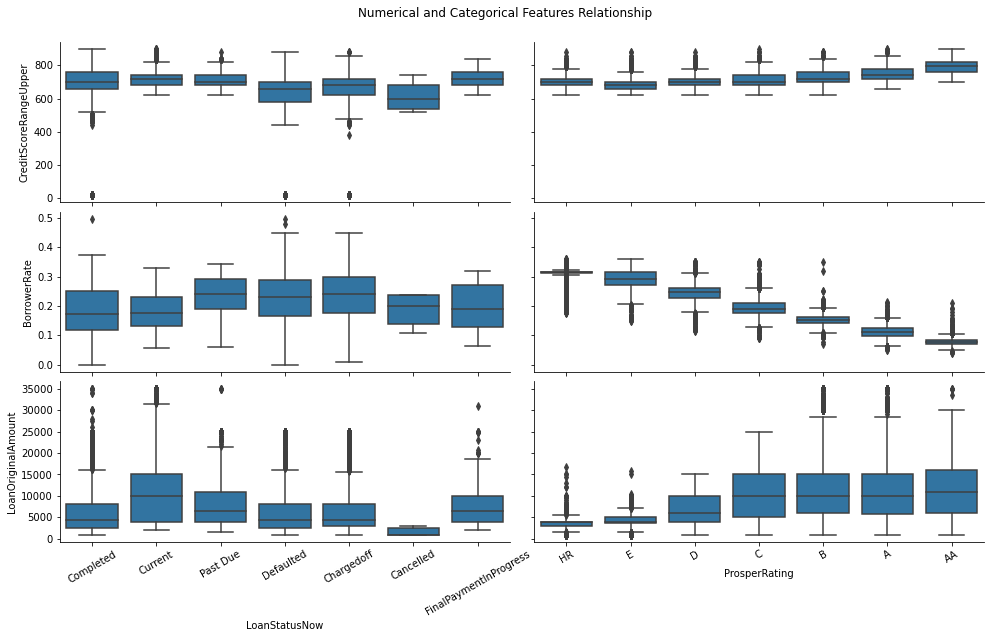

In [10]:
# Creating a plot matrix to check the correlation among selected variables.

plt.figure(figsize = [14, 8])
default_color = sb.color_palette()[0]

g = sb.PairGrid(data = loans, y_vars = num_vars, x_vars = ['LoanStatusNow', 'ProsperRating'],
                height = 4, aspect = 1.5);
g.map(sb.boxplot, color=default_color);

for ax in g.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30) //This also works
    plt.setp(ax.get_xticklabels(), rotation=30)

g.fig.set_size_inches(14, 8);
g.fig.subplots_adjust(top=0.92) 
g.fig.suptitle('Numerical and Categorical Features Relationship')

plt.show();

### Generate Slideshow 

In [ ]:
# Use thiommand if you are running this file in local
!jupyter nbconvert Prosper_Loans_Project_Part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Prosper_Loans_Project_Part_2.ipynb to slides
[NbConvertApp] Writing 822178 bytes to Prosper_Loans_Project_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Prosper_Loans_Project_Part_2.slides.html
Use Control-C to stop this server
